In [67]:
# 1 Inicio
# 1.1 Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# 1.2 Abrir los archivos CSV
df_cash = pd.read_csv('extract - cash request - data analyst.csv')
df_fees = pd.read_csv('extract - fees - data analyst - .csv')

# 1.3 Mostrar las primeras filas de los DataFrames
print("\n\033[1m\033[95mPARTE 1: Primeras filas\033[0m")
print("Cash head:")
display(df_cash.head())
print("Fees head:")
display(df_fees.head())


PARTE 1: Primeras filas
Cash head:


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


Fees head:


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [71]:
# 2. Información de los DataFrames
# 2.1 Mostrar información de los tipos de datos
print("\n\033[1m\033[95mPARTE 2: Descripción estadística\033[0m")
print("Info df_cash:")
print(df_cash.info())
print("----------------------------------------------------------")
print("Info df_fees:")
print(df_fees.info())
print("----------------------------------------------------------")
# 2.2 Mostrar descripción estadística
#print("Descripción estadística de Cash:")
#print(df_cash.describe())
#print("----------------------------------------------------------")
#print("Descripción estadística de Fees:")
#print(df_fees.describe())
#print("----------------------------------------------------------")


PARTE 2: Descripción estadística
Info df_cash:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-nu

In [73]:
# 3. Limpiar fechas para agrupar por meses
# 3.1 Definir las columnas de fechas para Cash y Fees
#print("\n\033[1m\033[95mPARTE 3: Agrupar por meses\033[0m")
date_columns_cash = [
    'created_at', 'updated_at', 'moderated_at', 
    'reimbursement_date', 'cash_request_received_date', 
    'money_back_date', 'send_at', 'reco_creation', 
    'reco_last_update'
]
date_columns_fees = ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']

# 3.2 Convertir y normalizar las fechas con pd.to_datetime
for col in date_columns_cash:
    df_cash[col] = pd.to_datetime(df_cash[col], errors='coerce').dt.normalize()
for col in date_columns_fees:
    df_fees[col] = pd.to_datetime(df_fees[col], errors='coerce').dt.normalize()

In [74]:
# 4. Tipos de datos las columnas de fecha de ambos df:
print("\n\033[1m\033[95mPARTE 4: Tipos de datos las columnas de fecha de ambos df:\033[0m")
print("\nTipos de datos de Cash Requests:")
print(df_cash[date_columns_cash].dtypes)
print("\nTipos de datos de Fees:")
print(df_fees[date_columns_fees].dtypes)


PARTE 4: Tipos de datos las columnas de fecha de ambos df:

Tipos de datos de Cash Requests:
created_at                    datetime64[ns, UTC]
updated_at                    datetime64[ns, UTC]
moderated_at                  datetime64[ns, UTC]
reimbursement_date            datetime64[ns, UTC]
cash_request_received_date         datetime64[ns]
money_back_date               datetime64[ns, UTC]
send_at                       datetime64[ns, UTC]
reco_creation                 datetime64[ns, UTC]
reco_last_update              datetime64[ns, UTC]
dtype: object

Tipos de datos de Fees:
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
paid_at       datetime64[ns, UTC]
from_date     datetime64[ns, UTC]
to_date       datetime64[ns, UTC]
dtype: object


In [75]:
# 5.1 Ordenar por 'created_at' en ambos DataFrames
df_cash_sorted = df_cash.sort_values(by='created_at', ascending=True)
df_fees_sorted = df_fees.sort_values(by='created_at', ascending=True)

# 5.2 Mostrar los primeros resultados después de ordenar
print("\n\033[1m\033[95mPARTE 5: Resultados después de ordenar por fecha de creación:\033[0m")
print("Cash sorted by created_at:")
display(df_cash_sorted.head())
print("Fees sorted by created_at:")
display(df_fees_sorted.head())


PARTE 5: Resultados después de ordenar por fecha de creación:
Cash sorted by created_at:


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7920,3,1.0,canceled,2019-11-19 00:00:00+00:00,2020-12-14 00:00:00+00:00,47.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
7260,4,100.0,money_back,2019-12-09 00:00:00+00:00,2020-11-04 00:00:00+00:00,NaN,NaT,1309.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
0,5,100.0,rejected,2019-12-10 00:00:00+00:00,2019-12-11 00:00:00+00:00,804.0,2019-12-11 00:00:00+00:00,NaN,2020-01-09 00:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
4118,13,100.0,direct_debit_rejected,2019-12-10 00:00:00+00:00,2020-11-04 00:00:00+00:00,406.0,2019-12-11 00:00:00+00:00,NaN,NaT,2019-12-12,NaT,regular,NaT,pending,2020-03-20 00:00:00+00:00,2020-03-31 00:00:00+00:00
7785,28,100.0,money_back,2019-12-10 00:00:00+00:00,2020-11-04 00:00:00+00:00,140.0,2019-12-11 00:00:00+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT


Fees sorted by created_at:


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1211,46,1858.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1858,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-06 00:00:00+00:00,2020-06-09 00:00:00+00:00,before
1252,67,2292.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2292,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-07 00:00:00+00:00,2020-06-22 00:00:00+00:00,before
1214,56,2117.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2117,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,NaT,NaT,before
20555,60,1503.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 00:00:00+00:00,2021-01-19 00:00:00+00:00,NaT,2020-06-19 00:00:00+00:00,2020-07-04 00:00:00+00:00,before
1231,57,1503.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 00:00:00+00:00,2021-01-19 00:00:00+00:00,NaT,2020-07-04 00:00:00+00:00,2020-07-19 00:00:00+00:00,before


In [79]:
# 6 Creacion de cohortes
print("\n\033[1m\033[95mPARTE 6: Creación de cohortes\033[0m")
# 6.1 Llenar valores nulos de 'user_id' con 'deleted_account_id'
df_cash['user_id'] = df_cash['user_id'].fillna(df_cash['deleted_account_id'])

# 6.2 Eliminar filas con user_id aún nulos
df_cash = df_cash[~df_cash['user_id'].isna()]

# 6.3 Agrupar por user_id y obtener la primera fecha de created_at
cohorts = df_cash.groupby('user_id')['created_at'].min().reset_index()
cohorts.rename(columns={'created_at': 'first_created_at'}, inplace=True)

# 6.4 Crear una nueva columna con el formato de mes y año
cohorts['cohort'] = cohorts['first_created_at'].dt.tz_localize(None).dt.to_period('M').astype(str)

# 6.5 Unir los cohorts al DataFrame original
df_cash = df_cash.merge(cohorts[['user_id', 'cohort']], on='user_id', how='left')

# 6.6 Mostrar los primeros resultados para verificar
display(df_cash[['user_id', 'created_at', 'cohort']].head())


PARTE 6: Creación de cohortes


,user_id,created_at,cohort
0,804.0,2019-12-10 00:00:00+00:00,2019-12
1,231.0,2019-12-10 00:00:00+00:00,2019-12
2,191.0,2019-12-10 00:00:00+00:00,2019-12
3,761.0,2019-12-10 00:00:00+00:00,2019-12
4,7686.0,2020-05-06 00:00:00+00:00,2020-05


In [81]:
# 7. Ordenar el DataFrame df_cash por la columna created_at
df_cash_sorted = df_cash.sort_values(by='created_at', ascending=True)

# 7.1 Mostrar los primeros resultados después de ordenar
print("\n\033[1m\033[95mPARTE 7: Ordenar\033[0m")
print("DataFrame cash ordenado por created_at:")
display(df_cash_sorted[['user_id', 'created_at', 'cohort', 'deleted_account_id']])


PARTE 7: Ordenar
DataFrame cash ordenado por created_at:


,user_id,created_at,cohort,deleted_account_id
7920,47.0,2019-11-19 00:00:00+00:00,2019-11,NaN
7260,1309.0,2019-12-09 00:00:00+00:00,2019-12,1309.0
0,804.0,2019-12-10 00:00:00+00:00,2019-12,NaN
4118,406.0,2019-12-10 00:00:00+00:00,2019-12,NaN
7785,140.0,2019-12-10 00:00:00+00:00,2019-12,NaN
...,...,...,...,...
17945,160.0,2020-11-01 00:00:00+00:00,2020-05,NaN
17944,26094.0,2020-11-01 00:00:00+00:00,2020-08,NaN
21083,34866.0,2020-11-01 00:00:00+00:00,2020-09,NaN
18028,23216.0,2020-11-01 00:00:00+00:00,2020-07,NaN



PARTE 8: Distribución de usuarios por cohorte


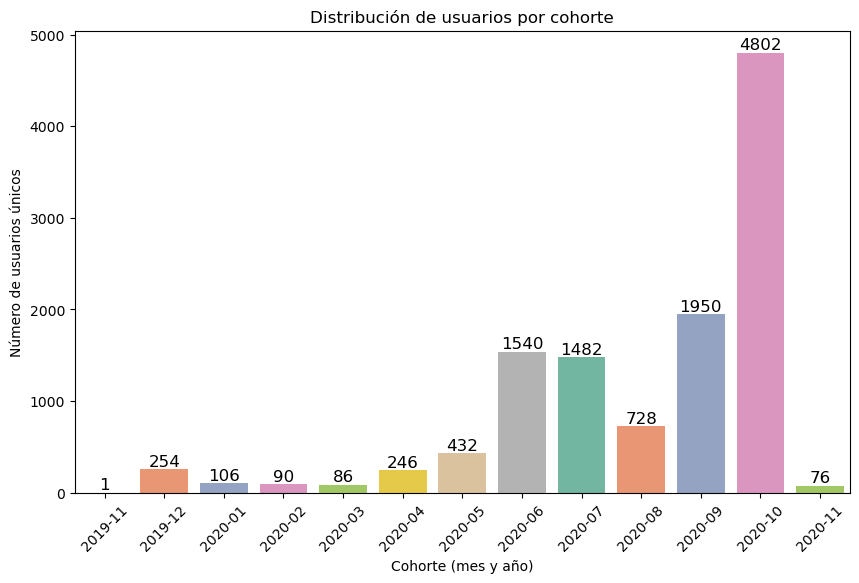

In [83]:
# 8. Gráfico - Distribución de usuarios por cohorts
print("\n\033[1m\033[95mPARTE 8: Distribución de usuarios por cohorte\033[0m")

# Contar usuarios únicos por cohort
cohort_counts = df_cash.groupby('cohort')['user_id'].nunique()

# 8.1 Visualización de la distribución de usuarios por cohort
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cohort_counts.index.astype(str), y=cohort_counts.values, hue=cohort_counts.index.astype(str), palette='Set2', legend=False)
plt.title('Distribución de usuarios por cohorte')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Número de usuarios únicos')
plt.xticks(rotation=45)

# 8.2 Añadir la cantidad total arriba de cada columna
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


PARTE 9: Distribución de estados de las solicitudes de dinero

Distribución de los estados de las solicitudes de dinero
status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


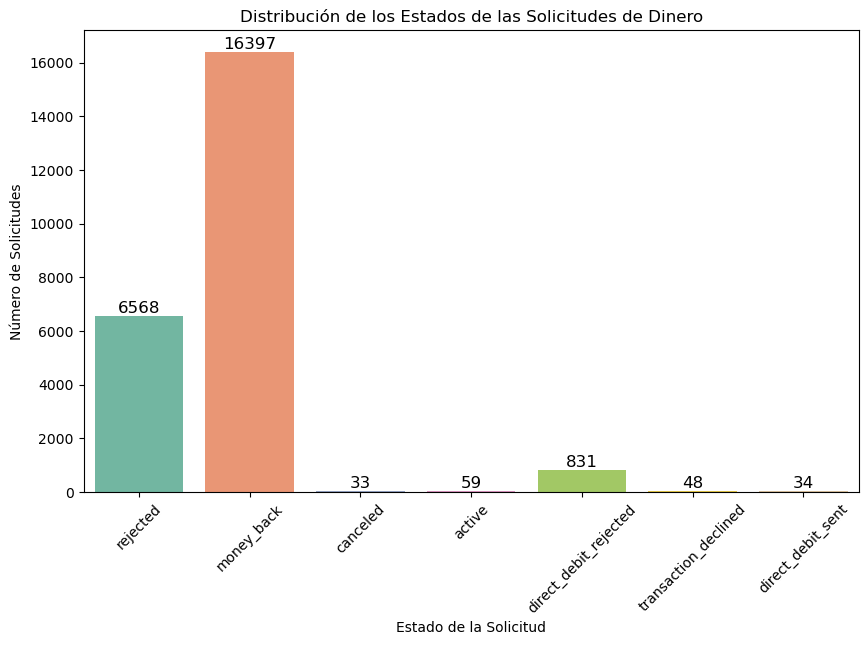

In [84]:
# 9.1 Distribución de los estados actuales
print("\n\033[1m\033[95mPARTE 9: Distribución de estados de las solicitudes de dinero\033[0m")
status_distribution = df_cash['status'].value_counts()
print("\nDistribución de los estados de las solicitudes de dinero")
print(status_distribution)

# 9.2 Visualización de la distribución de los estados
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='status', data=df_cash, palette='Set2', hue='status', legend=False)  # Asignar hue
plt.title('Distribución de los Estados de las Solicitudes de Dinero')
plt.xlabel('Estado de la Solicitud')
plt.ylabel('Número de Solicitudes')
plt.xticks(rotation=45)

# 9.3 Añadir la cantidad total arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.show()


PARTE 10: Frecuencia media por cohorte


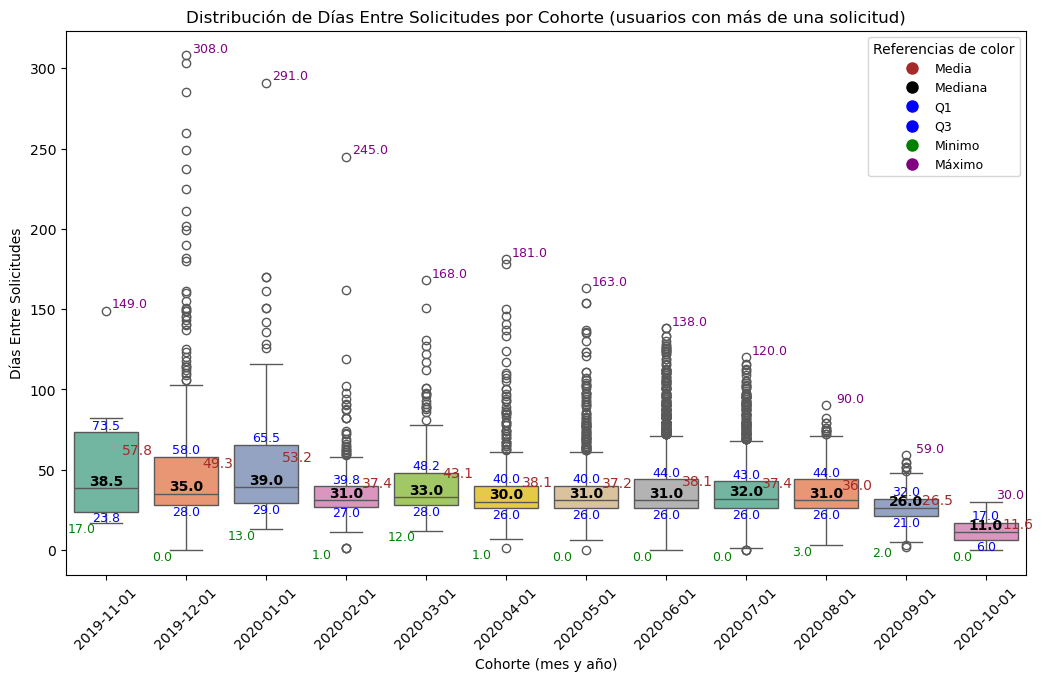

-----------------------------------------------------------------------------------------------------------------------------------------------


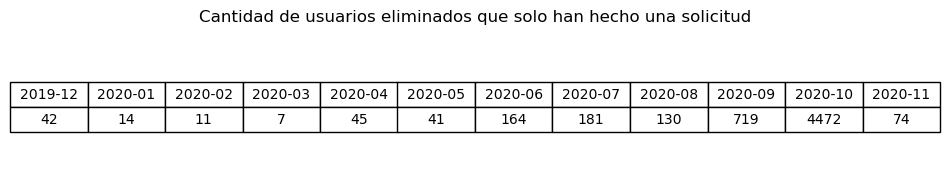

In [86]:
# 10 Frecuencia media por cohorte
print("\n\033[1m\033[95mPARTE 10: Frecuencia media por cohorte\033[0m")
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'])
df_cash['cohort'] = pd.to_datetime(df_cash['cohort'], format='%Y-%m')

# 10.1 Filtrar usuarios que han hecho más de una solicitud, excluyendo 'rejected'
user_counts = df_cash['user_id'].value_counts()
multiple_requests_users = user_counts[user_counts > 1].index
df_cash_filtered = df_cash[(df_cash['status'] != 'rejected') & (df_cash['user_id'].isin(user_counts[user_counts > 1].index))]

# 10.2 Calcular la frecuencia por usuario como la diferencia entre solicitudes
df_cash_filtered = df_cash_filtered.sort_values(by=['user_id', 'created_at'])
df_cash_filtered['days_between'] = df_cash_filtered.groupby('user_id')['created_at'].diff().dt.days.dropna()

# 10.3 Calcular el número de usuarios que solo han hecho una solicitud por cohorte
single_request_users = user_counts[user_counts == 1].index
df_cash_single_request = df_cash[df_cash['user_id'].isin(single_request_users) & (df_cash['status'] != 'rejected')]
single_request_count = df_cash_single_request.groupby('cohort')['user_id'].nunique().reset_index(name='single_request_count')
# Ordenar cronoogicamente los cohortes en el eje x
df_cash_filtered['cohort'] = pd.to_datetime(df_cash_filtered['cohort'])
df_cash_filtered = df_cash_filtered.sort_values(by='cohort')
single_request_count['cohort'] = pd.to_datetime(single_request_count['cohort'])
single_request_count = single_request_count.sort_values(by='cohort')

# 10.4 Visualizar el diagrama de cajas por cohort, añadiendo valores clave
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='cohort', y='days_between',hue='cohort', data=df_cash_filtered, palette='Set2')

# Calcular y añadir valores clave como cuartiles, mediana, media, máximo y mínimo
stats = df_cash_filtered.groupby('cohort')['days_between'].describe()

for i, cohort in enumerate(stats.index):
    median = stats.loc[cohort, '50%']
    q1 = stats.loc[cohort, '25%']
    q3 = stats.loc[cohort, '75%']
    mean = stats.loc[cohort, 'mean']
    minimum = stats.loc[cohort, 'min']
    maximum = stats.loc[cohort, 'max']
    
    # Desplazar los textos a la derecha
    plt.text(i - 0.0, median, f'{median:.1f}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.0, q1, f'{q1:.1f}', ha='center', va='top', color='blue', fontsize=9)
    plt.text(i + 0.0, q3, f'{q3:.1f}', ha='center', va='bottom', color='blue', fontsize=9)
    plt.text(i + 0.4, mean, f'{mean:.1f}', ha='center', va='bottom', color='brown', fontsize=10)
    plt.text(i - 0.3, minimum, f'{minimum:.1f}', ha='center', va='top', color='green', fontsize=9)
    plt.text(i + 0.3, maximum, f'{maximum:.1f}', ha='center', va='bottom', color='purple', fontsize=9)

# 10.6 Ajustes visuales
plt.xticks(rotation=45)
plt.title('Distribución de Días Entre Solicitudes por Cohorte (usuarios con más de una solicitud)')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Días Entre Solicitudes')

# 10.7 Agregar leyenda para los colores
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Media', markerfacecolor='brown', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Mediana', markerfacecolor='black', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Q1', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Q3', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Minimo', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Máximo', markerfacecolor='purple', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=9, title='Referencias de color')

# 10.8 Ajustar el layout para los textos desplazados
plt.subplots_adjust(left=0.1, bottom=0.2)
# 10.9 Mostrar el diagrama
plt.show()

print("-----------------------------------------------------------------------------------------------------------------------------------------------")
#10.9.1 Crear una nueva figura de tabla horizontal para incluir a los usuarios eliminados
plt.figure(figsize=(12, 2))
table = plt.table(cellText=[single_request_count['single_request_count'].values],
                  colLabels=single_request_count['cohort'].dt.strftime('%Y-%m'),
                  loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Ocultar ejes ya que solo mostramos la tabla
plt.axis('off')
plt.title('Cantidad de usuarios eliminados que solo han hecho una solicitud')
#10.9.2 Mostrar la nueva tabla
plt.show()


PARTE 11: Analizar ingresos generados por cohorte


,id_x,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,id_y,cohort
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 00:00:00+00:00,2020-10-13 00:00:00+00:00,2020-12-17 00:00:00+00:00,NaT,NaT,after,14941.0,2020-09-01
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 00:00:00+00:00,2020-10-13 00:00:00+00:00,2020-12-08 00:00:00+00:00,NaT,NaT,after,11714.0,2020-06-01
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 00:00:00+00:00,2020-10-23 00:00:00+00:00,2020-11-04 00:00:00+00:00,NaT,NaT,after,23371.0,2020-10-01
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 00:00:00+00:00,2020-10-31 00:00:00+00:00,2020-11-19 00:00:00+00:00,NaT,NaT,after,26772.0,2020-10-01
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 00:00:00+00:00,2020-10-13 00:00:00+00:00,2020-11-02 00:00:00+00:00,NaT,NaT,after,19350.0,2020-06-01


Ingresos generados por cohorte:


,total_amount
cohort,
2019-11-01,30.0
2019-12-01,1130.0
2020-01-01,460.0
2020-02-01,635.0
2020-03-01,645.0
2020-04-01,1585.0
2020-05-01,3930.0
2020-06-01,14365.0
2020-07-01,11135.0


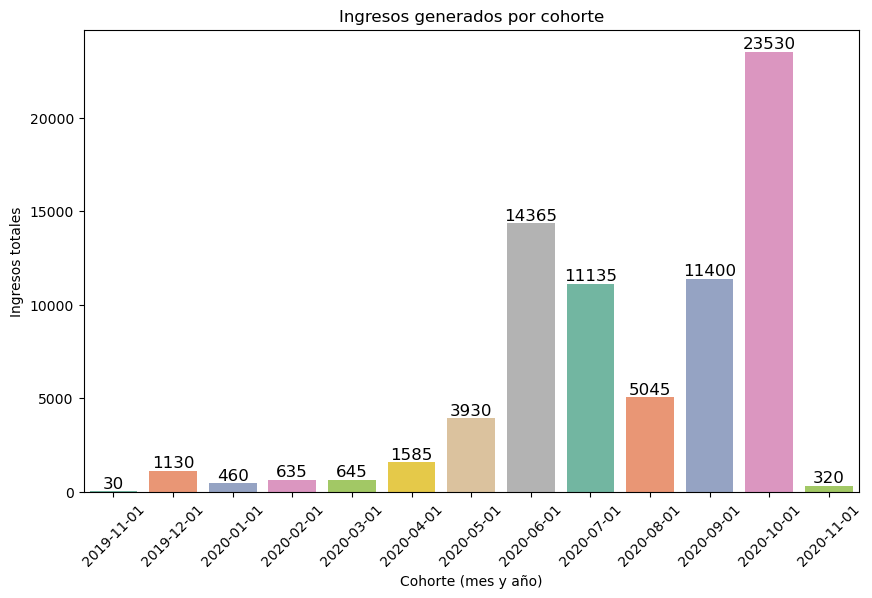

In [87]:
# 11. Analizar los ingresos generados por cohorte
print("\n\033[1m\033[95mPARTE 11: Analizar ingresos generados por cohorte\033[0m")

# 11.1 Hacemos un merge de ambos df 
df_combinados = df_fees.merge(df_cash[['id', 'cohort']], left_on='cash_request_id', right_on='id', how='left')

# 11.2 Verificamos la union de los data frame
display(df_combinados.head())

# 11.3 Contemplamos solo las comisiones que han sido aceptadas, ya que son las unicas que han generado ingresos registrados.
df_aprobados = df_combinados[(df_combinados['status'] == 'accepted')]

# 11.4 Agrupamos los ingresos por cohorte
ingresos_generados = df_aprobados[["total_amount", "cohort"]].groupby("cohort").sum()
print("Ingresos generados por cohorte:")
display(ingresos_generados)

# 11.5 Graficamos los ingresos generados por cohorte
plt.figure(figsize=(10, 6))
graf_ing = sns.barplot(x='cohort', y='total_amount', hue='cohort', data=ingresos_generados, palette='Set2', legend=False)
plt.title('Ingresos generados por cohorte')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
for p in graf_ing.patches:
    graf_ing.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),  
                      ha='center', va='bottom', fontsize=12)  
plt.show()


PARTE 12: Distribución de estado por cohorte


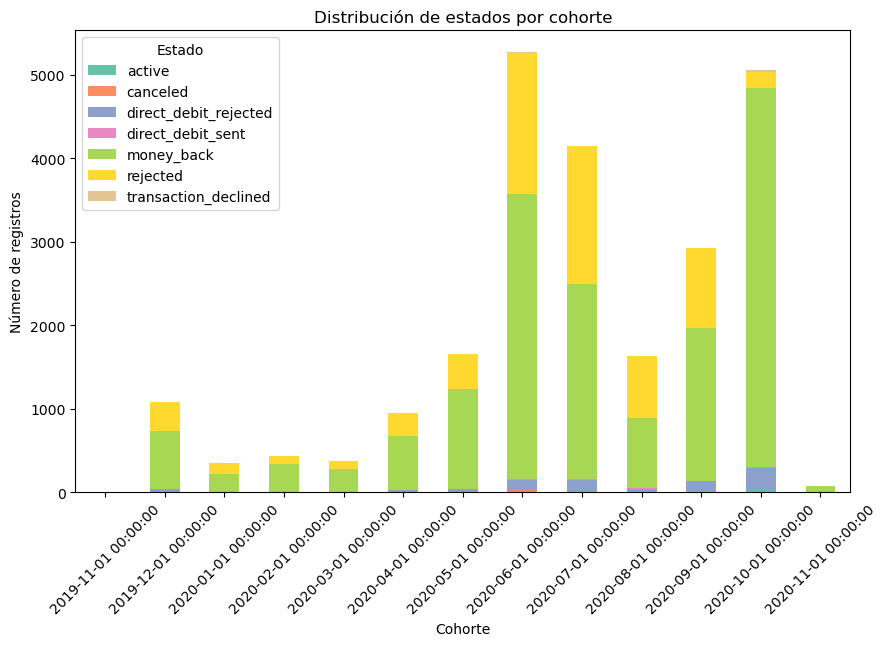

In [89]:
# 12. Distribución de estado por cohorte
print("\n\033[1m\033[95mPARTE 12: Distribución de estado por cohorte\033[0m")
cohort_status_counts = df_cash.pivot_table(index='cohort', columns='status', aggfunc='size', fill_value=0)

# Usar paleta Set2 de Seaborn
palette = sns.color_palette("Set2")

# Graficar
cohort_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)
plt.title('Distribución de estados por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.legend(title='Estado')
plt.show()


PARTE 13: Tasas de incidentes por cohorte en %
Distribución de los estados de las solicitudes:


status,active,canceled,direct_debit_rejected,direct_debit_sent,money_back,rejected,transaction_declined
cohort,,,,,,,
2019-11-01 00:00:00,0,1,0,0,6,1,0
2019-12-01 00:00:00,0,1,41,2,690,345,1
2020-01-01 00:00:00,0,0,11,0,215,128,0
2020-02-01 00:00:00,1,0,8,0,330,101,1
2020-03-01 00:00:00,1,0,4,1,277,88,0
2020-04-01 00:00:00,0,0,34,1,642,275,0
2020-05-01 00:00:00,1,1,41,2,1192,423,0
2020-06-01 00:00:00,12,14,126,4,3415,1687,8
2020-07-01 00:00:00,14,3,136,3,2338,1648,5


Tasa de incidentes por cohorte (%):


,cohort,incident_rate
0,2019-11-01,25.000000
1,2019-12-01,36.111111
2,2020-01-01,39.265537
3,2020-02-01,24.943311
4,2020-03-01,25.067385
5,2020-04-01,32.563025
6,2020-05-01,28.132530
7,2020-06-01,34.922142
8,2020-07-01,43.284302
9,2020-08-01,48.223039


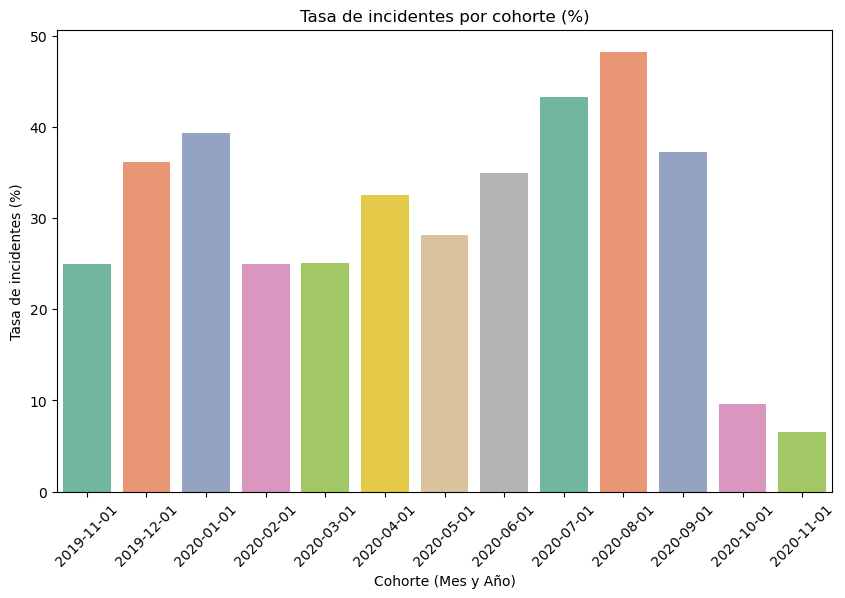

In [92]:
# 13. Tasas de incidentes por cohorte en %
print("\n\033[1m\033[95mPARTE 13: Tasas de incidentes por cohorte en %\033[0m")

# 13.1 Agregamos una fila con los totales para cada cohorte
cohort_status_counts.loc['Total'] = cohort_status_counts.sum()
# Mostramos el DataFrame con los totales
print("Distribución de los estados de las solicitudes:")
display(cohort_status_counts)

# Definir los estados de incidentes a filtrar
incident_status = ['rejected', 'failed', 'canceled', 'error', 'direct_debit_rejected', 'direct_debit_sent', 'transaction_declined']

# 13.2 Filtrar solo los incidentes de pago
incident_df = df_cash[df_cash['status'].isin(incident_status)]

# 13.3 Contar el número de incidentes por cohorte
incident_counts = incident_df.groupby('cohort')['status'].count().reset_index(name='incidents_count')

# 13.4 Obtener el total de solicitudes por cohorte
total_requests = df_cash.groupby('cohort')['status'].count().reset_index(name='total_count')

# 13.5 Combinar ambas tablas para calcular la tasa de incidentes
cohort_incident_rate = incident_counts.merge(total_requests, on='cohort')
cohort_incident_rate['incident_rate'] = (cohort_incident_rate['incidents_count'] / cohort_incident_rate['total_count']) * 100

# 13.6 Mostrar la tasa de incidentes por cohorte
print("Tasa de incidentes por cohorte (%):")
display(cohort_incident_rate[['cohort', 'incident_rate']])

# 13.7 Visualización de la tasa de incidentes por cohorte
plt.figure(figsize=(10, 6))
sns.barplot(x='cohort', y='incident_rate', hue='cohort', data=cohort_incident_rate, palette='Set2')
plt.xticks(rotation=45)
plt.title('Tasa de incidentes por cohorte (%)')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Tasa de incidentes (%)')
plt.show()


PARTE 14: Porcentaje de incidentes por cohorte y tipo de estado


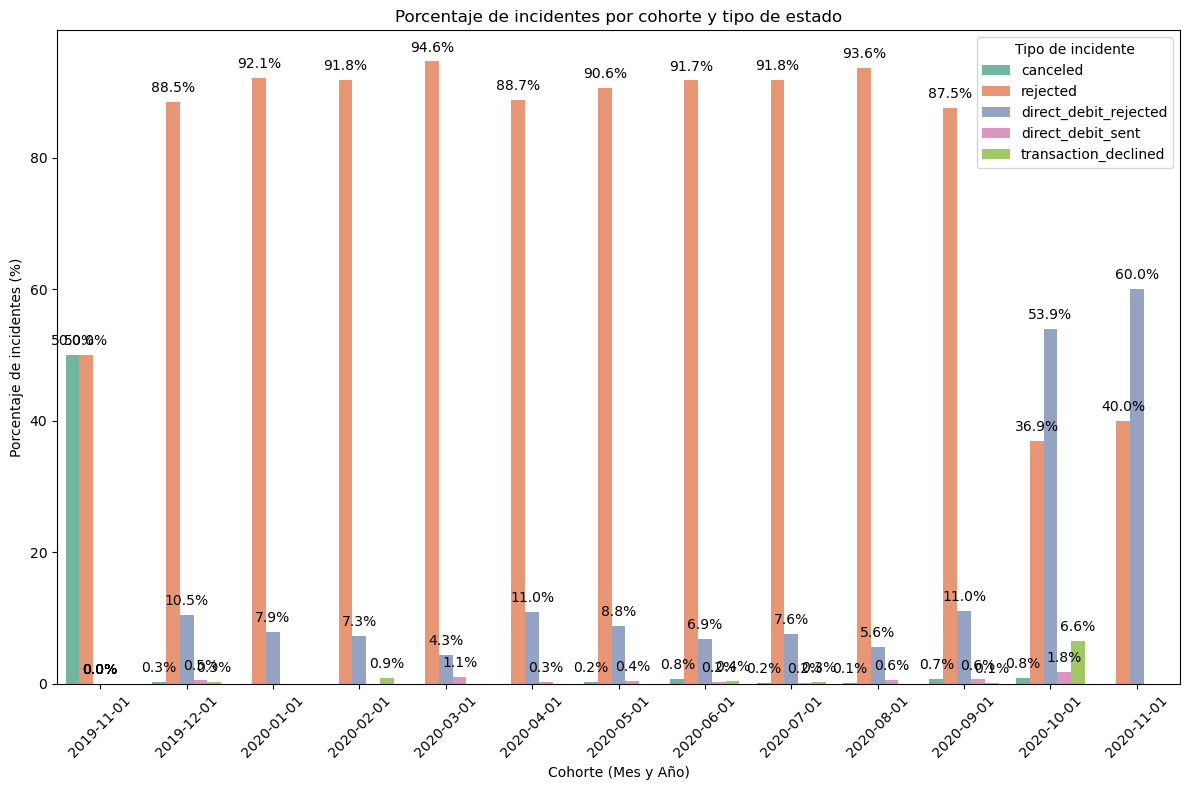

In [95]:
# 14. Porcentaje de incidentes por cohorte y tipo de estado
print("\n\033[1m\033[95mPARTE 14: Porcentaje de incidentes por cohorte y tipo de estado\033[0m")

# 14.1 Contar el número de incidentes por cohorte y tipo de estado
incident_counts2 = incident_df.groupby(['cohort', 'status']).size().reset_index(name='incidents_count')

# 14.2 Obtener el total de incidentes por cohorte para calcular el porcentaje
total_incidents_per_cohort = incident_counts2.groupby('cohort')['incidents_count'].sum().reset_index(name='total_incidents')

# 14.3 Combinar las tablas para calcular el porcentaje
incident_counts2 = incident_counts2.merge(total_incidents_per_cohort, on='cohort')
incident_counts2['percentage'] = (incident_counts2['incidents_count'] / incident_counts2['total_incidents']) * 100

# 14.4 Visualización de los incidentes como porcentajes por cohorte y tipo de estado
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=incident_counts2, x='cohort', y='percentage', hue='status', palette='Set2')
plt.xticks(rotation=45)
plt.title('Porcentaje de incidentes por cohorte y tipo de estado')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Porcentaje de incidentes (%)')
plt.legend(title='Tipo de incidente')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),  # Desplazamiento vertical
                      textcoords='offset points')
plt.tight_layout()
plt.show()


PARTE 15: Porcentaje de incidentes por cohorte y tipo de estado apilado


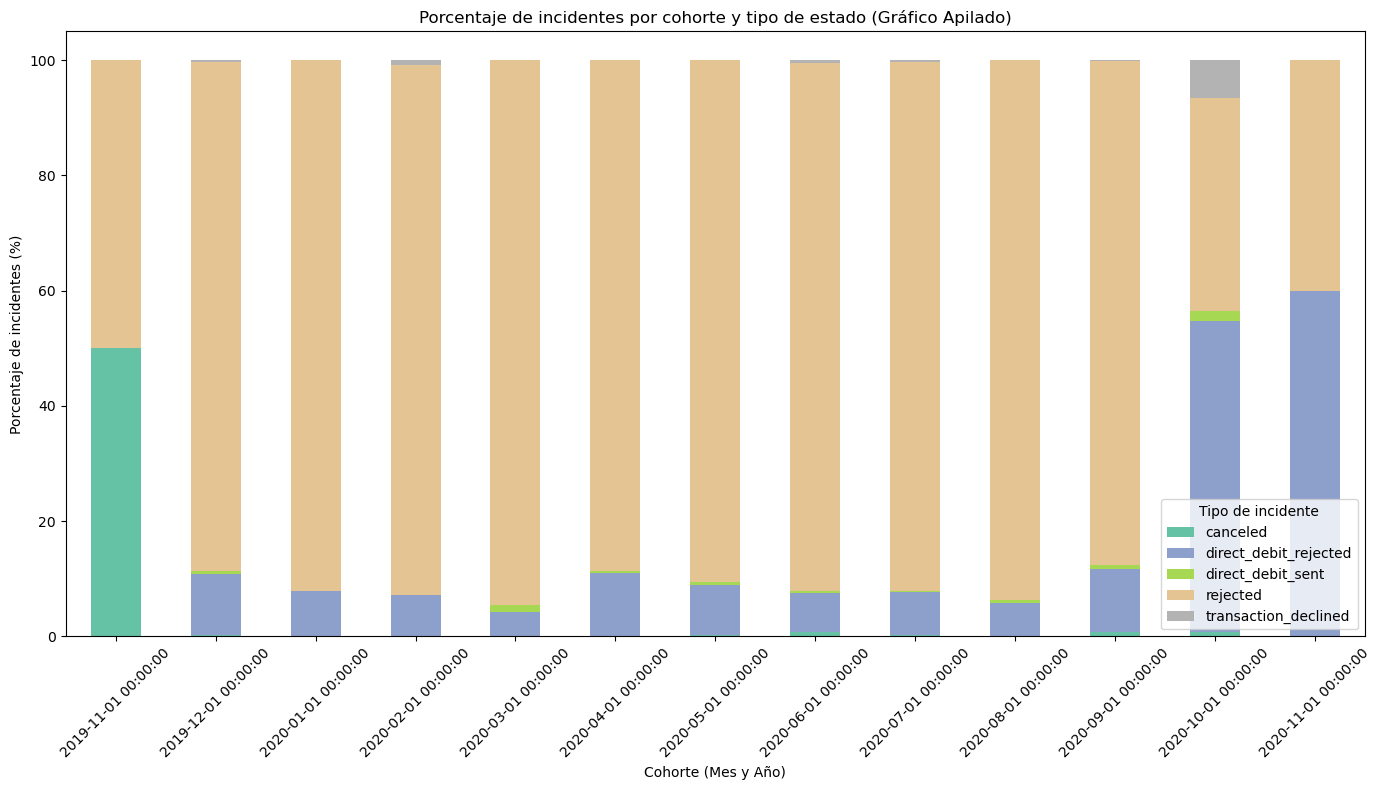

In [97]:
# 15. Porcentaje de incidentes por cohorte y tipo de estado apilado
print("\n\033[1m\033[95mPARTE 15: Porcentaje de incidentes por cohorte y tipo de estado apilado\033[0m")
# Visualización de los incidentes como porcentajes por cohorte y tipo de estado (gráfico apilado)
plt.figure(figsize=(14, 8))
# 15.1 Usamos pivot_table para reestructurar el DataFrame
incident_pivot = incident_counts2.pivot_table(index='cohort', columns='status', values='percentage', fill_value=0)
# 15.2 Graficar como un gráfico de barras apiladas
incident_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
plt.xticks(rotation=45)
plt.title('Porcentaje de incidentes por cohorte y tipo de estado (Gráfico Apilado)')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Porcentaje de incidentes (%)')
plt.legend(title='Tipo de incidente')
plt.tight_layout()
plt.show()


PARTE 16: Desglose de incidencias por tipo y cantidad


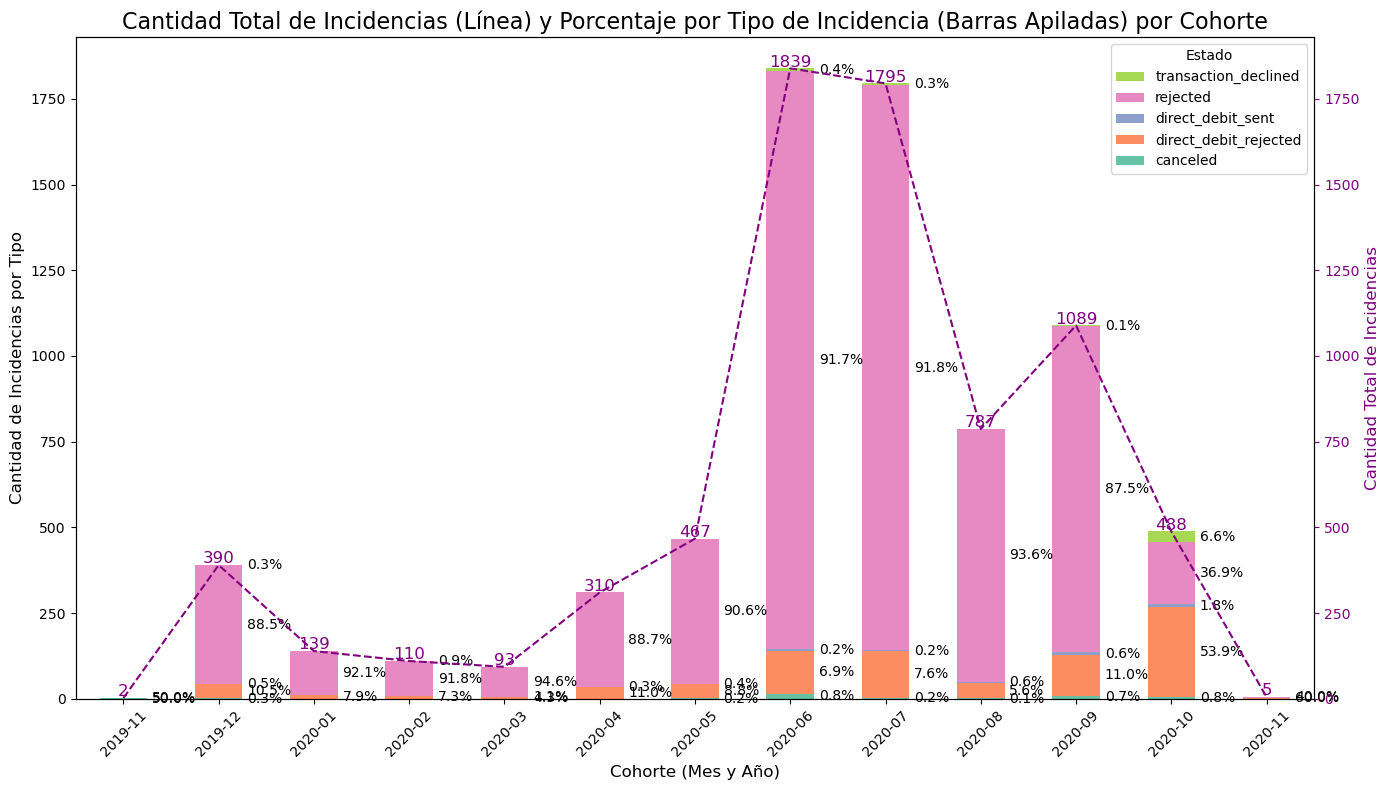

In [119]:
# 16 Desglose de incidencias por tipo y cantidad
print("\n\033[1m\033[95mPARTE 16: Desglose de incidencias por tipo y cantidad\033[0m")

# 16.1 Crear una tabla pivote para obtener la cantidad de incidencias por cohorte y tipo de incidencia
incident_pivot = incident_counts2.pivot_table(index='cohort', columns='status', values='incidents_count', fill_value=0)

# 16.2 Agrupar por cohorte y obtener la cantidad total de incidentes
cohort_incidents = incident_counts2.groupby('cohort').agg(
    total_incidents=('incidents_count', 'sum')
).reset_index()

# 16.3 Crear una figura y un eje
fig, ax1 = plt.subplots(figsize=(14, 8))

# 16.4 Graficar las barras apiladas para la cantidad de incidencias por tipo de incidente usando Set2
palette = sns.color_palette("Set2")
incident_pivot.plot(kind='bar', stacked=True, ax=ax1, color=palette)

# Convertir 'cohort' a formato datetime si no lo está ya
cohort_incidents['cohort'] = pd.to_datetime(cohort_incidents['cohort'], format='%Y-%m')

# 16.5 Establecer el título y etiquetas del eje y para el gráfico de barras
ax1.set_xlabel('Cohorte (Mes y Año)', fontsize=12)
ax1.set_ylabel('Cantidad de Incidencias por Tipo', fontsize=12)
plt.xticks(rotation=45)

# Formatear las etiquetas del eje X para mostrar solo año y mes
ax1.set_xticklabels(cohort_incidents['cohort'].dt.strftime('%Y-%m'))

# Añadir los porcentajes dentro de las barras
for i in range(len(incident_pivot)):
    total = cohort_incidents['total_incidents'].iloc[i]
    bottom = 0
    for j, val in enumerate(incident_pivot.iloc[i]):
        if val > 0:
            percentage = (val / total) * 100
            ax1.text(i + 0.3, bottom + val / 2, f'{percentage:.1f}%', ha='left', va='center', color='black', fontsize=10)
            bottom += val

# 16.6 Crear un segundo eje y para la cantidad total de incidencias
ax2 = ax1.twinx()

# 16.7 Graficar una línea para la cantidad total de incidencias por cohorte
sns.lineplot(x='cohort', y='total_incidents', data=cohort_incidents, ax=ax2, color='purple', marker='o')

# 16.8 Establecer etiquetas para el segundo eje y (cantidad total de incidencias)
ax2.set_ylabel('Cantidad Total de Incidencias', fontsize=12, color='purple')
ax2.tick_params('y', colors='purple')

# Añadir los valores totales encima de la línea
y_values = []
for i, total in enumerate(cohort_incidents['total_incidents']):
    ax2.text(i, total + 5, f'{int(total)}', ha='center', color='purple', fontsize=12)
    y_values.append(total)  # Almacenar los valores para la línea

# 16.9 Graficar la línea que conecta los totales
ax2.plot(cohort_incidents.index, y_values, color='purple', linestyle='--', linewidth=1.5)

# 16.9.1 Asegurar que ambos ejes compartan la misma escala
ax2.set_ylim(ax1.get_ylim())

# Invertir el orden de la leyenda
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], title='Estado')

# 16.9.2 Visualizar gráfico
plt.title('Cantidad Total de Incidencias (Línea) y Porcentaje por Tipo de Incidencia (Barras Apiladas) por Cohorte', fontsize=16)
plt.tight_layout()
plt.show()